###  Data/Domain Understanding and Exploration

#### Meaning and Type of Features

The dataset is a Car Sale Adverts dataset provided by AutoTrader(AT), one of our industry partners. The dataset contains 12 features and over 40,000 observations an anonymised collection of adverts with information on vehicles such as brand, type, colour, mileage, as well as the selling price.

The following are the description of each columns in the dataset:
- ***public_reference:*** key id of vehicle
- ***mileage:*** a number of miles travelled or covered
- ***reg_code:*** a sequence of letters and numbers assigned to a motor vehicle when it is registered
- ***standard_colour:*** colour of motor vehicle
- ***standard_make:*** vehicle automotive brand
- ***standard_model:*** specific model of a vehicle brand
- ***vehicle_condition:*** condition of the vehicle i.e used or new
- ***year_of_registration:*** the year a vehicle was registration
- ***price:*** the price of the vehicle
- ***body_type:*** body type of the vehicle
- ***crossover_car_and_van:*** A boolean (yes if the vehicle is a crossover car and van or No if its not)
- ***fuel_type:*** the type of fuel consumed by the vehicle

####  Analysis of Univariate Distributions

The image below shows the code and output which contains the columns, number of observations and datatype of each features

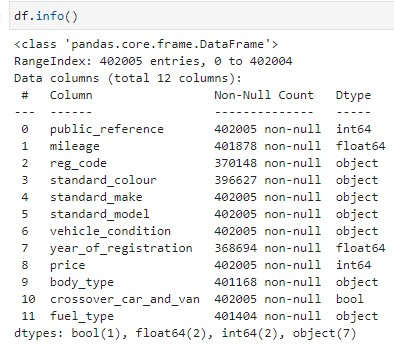

##### Some Univariate visualization

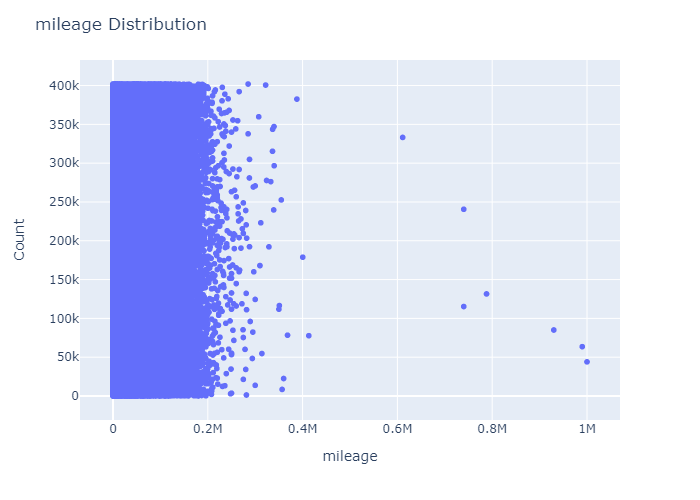

**Insight:**
- Multiple outliers available
- Majority of car mileage are below 200,000

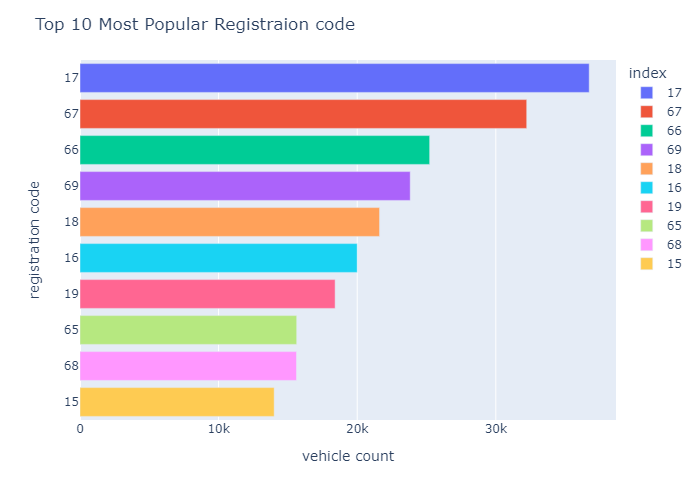

**Insight:** 17, 67, 66 respectively are the top 3 most popular registration code

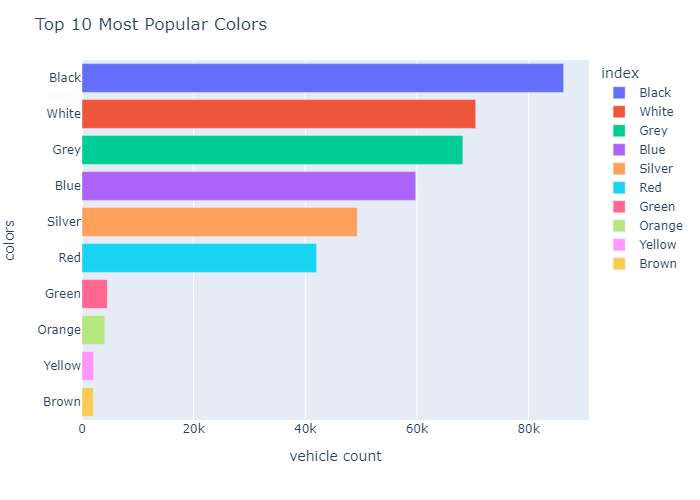

**Insight:** Black, White, Grey, Blue, Silver are the top 5 most popular color 

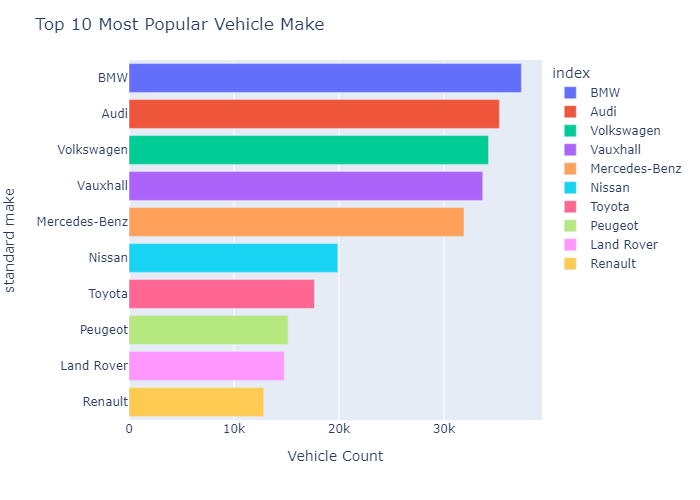

**Insight:**
BMW, Audi, Volswagwn, Vauxhall, Mercedes-Benz are the top 5 most popular vehicle brand

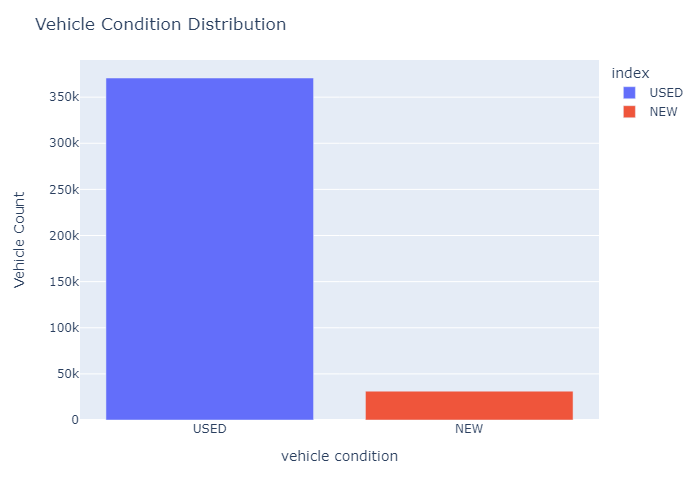

**Insight:**
Majority of the vehicles in the dataset are USED vehicles

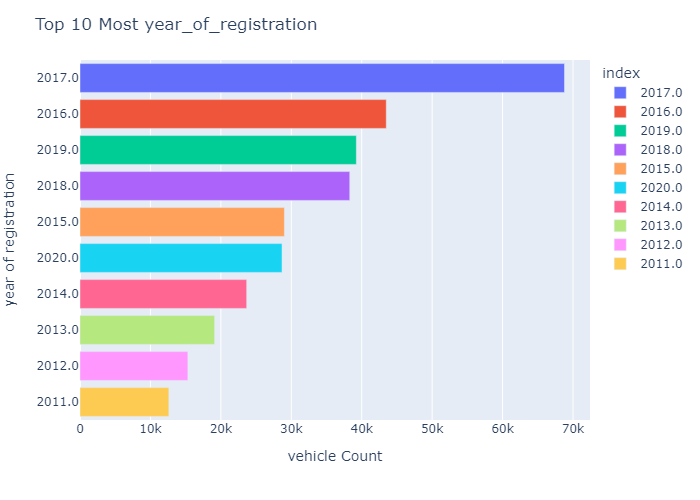

**Insight:**
Most of the vehicles were registarted in 2017

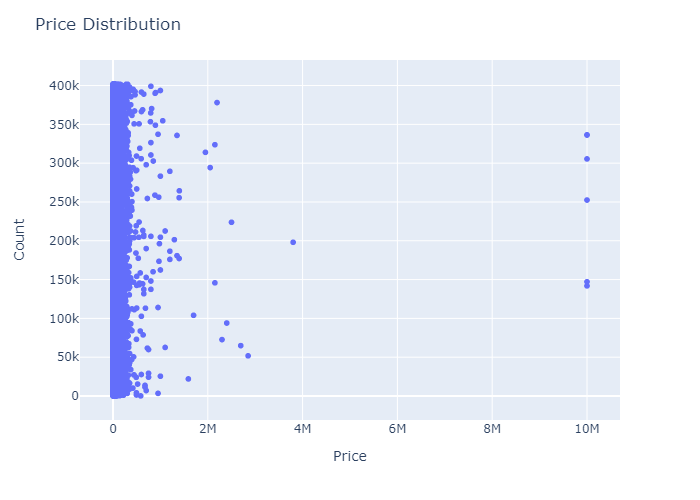

**Insight:**
- Possible outliers approaching 10M
- Most cars are below 500,000

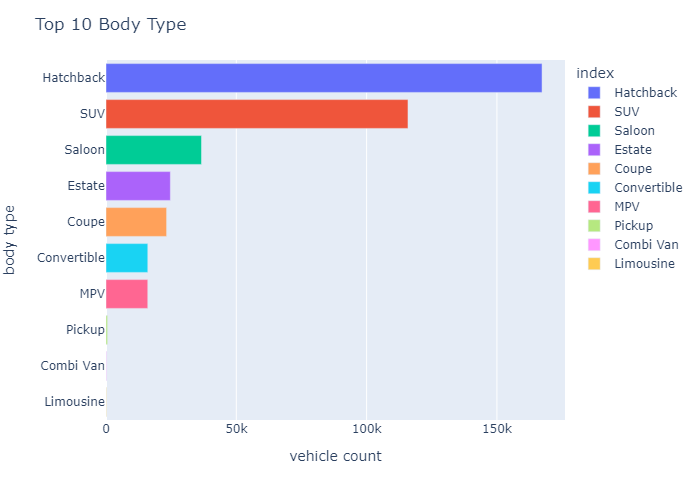

**Insight:**
Hatchback and SUV are the most popular body type of vehicle in the dataset

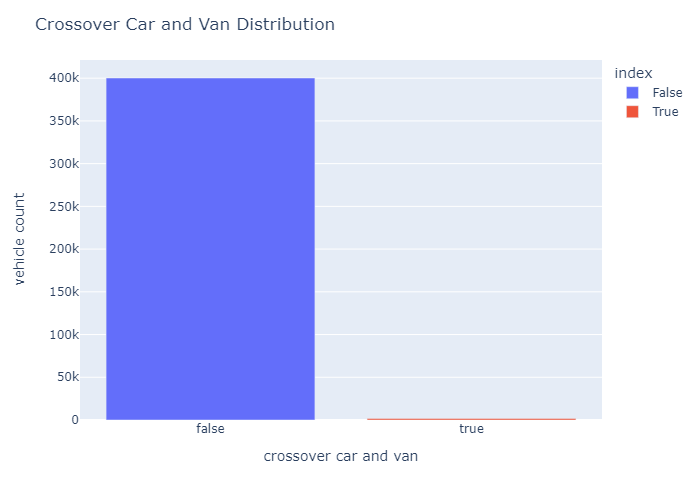

**Insight:**
Majority of the vehicles are not crossover car and van

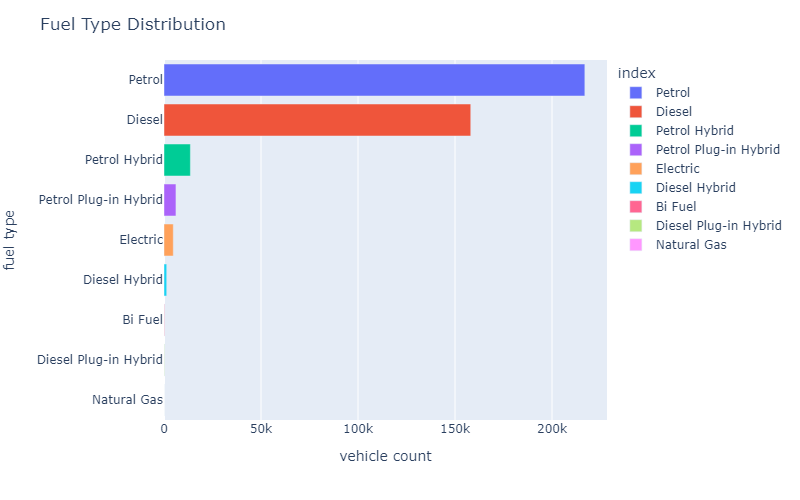

**Insight:**
Petrol and Diesel are the top most popular fuel type used by vehicles in the dataset

####  Analysis of Predictive Power of Features

The column 'reg_code' is dropped because registration code is related to year of registration,
'public_reference' is dropped because it is just the id and has no predictive power.

The features chosen to predict the price are:
- mileage
- standard_make
- standard_model
- vehicle_condition
- year_of_registration
- body_type
- crossover_car_and_van
- fuel_type

##### mileage

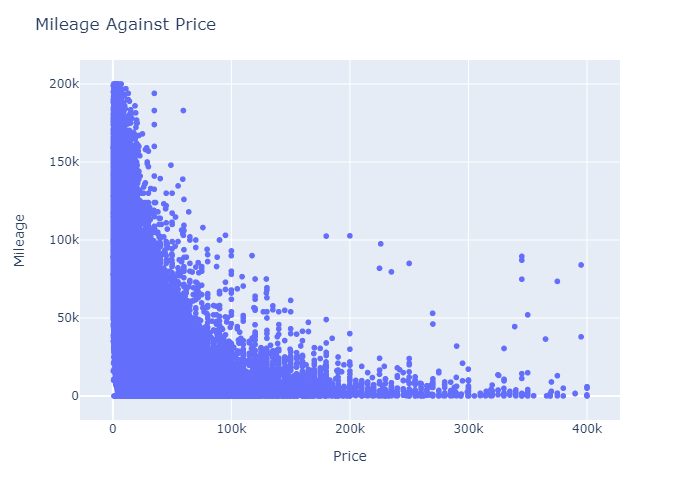

**Insights:**
Highly priced vehicle has relatively low mileage and vice versa

##### year_of_registraion

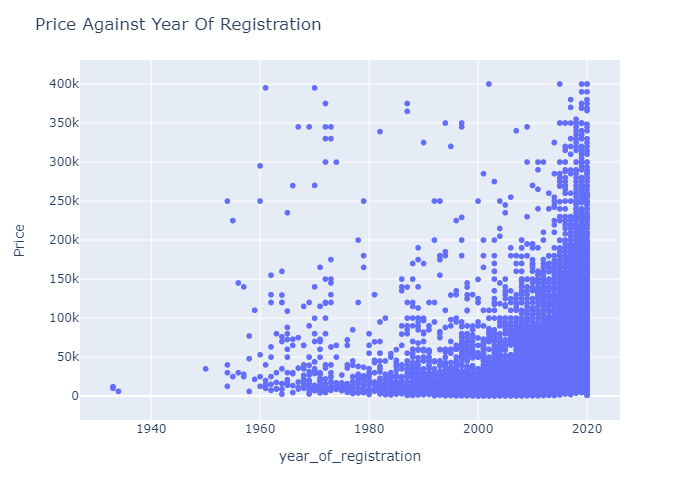

#### Data Processing for Data Exploration and Visualisation

Plotly which is a python library was used to plot charts. The data in the exploration stage is not preprocessed but just assesed and analyzed using pandas and plotly.

Example of the code used to plot price distribution


`fig = px.scatter(df, y='mileage', x='price')`

`fig.update_layout(`

`    title = 'Mileage Against Price',`

`    xaxis_title = 'Price',`

`    yaxis_title = 'Mileage'`

`)`
   
`fig.show(renderer='png')`


### Data Processing for Machine Learning

####  Dealing with Missing Values, Outliers and Noise

##### Missing Values

The following featues had missing values
- mileage
- standard_color
- year_of_registration
- body_type
- fuel_type

##### 1. mileage:
> rows with missing values were dropped.

##### 2. standard_color:
> replaced missing values with most frequent color(mode)

##### 3. year_of_registration:
> - replaced values of year_of_registration where vehicle_condition is NEW with '2020'. 
> - Then we obtain other values of year_of_registration from reg_code.
> - The rows with the missing values were dropped.
> - Example  of the code for cleaning year_of_registration

> 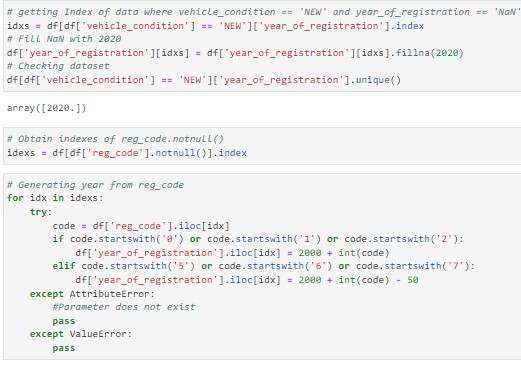


##### 4. body_type:
> - replaced values with the mode of body_type for vehicles with similar standard_make and standard_model. 
> - The rows with the missing values were dropped.

##### 5. fuel_type:
> - replaced values with the mode of fuel_type for vehicles with similar standard_make and standard_model. 
> - The rows with the missing values were dropped.

##### Outliers and Noise
Outliers are present in the following features:
- mileage
- price

##### 1. mileage:
> set cap of mileage to 200,000.

##### 2. price:
> set cap of price to 800,000.

#### Feature Engineering, Data Transformations, Feature Selection

**STEP1:** The features were seperated into predictors(x) and target(y).

The predictors(x) includes:
- mileage
- standard_make
- standard_model
- vehicle_condition
- year_of_registration
- body_type
- crossover_car_and_van
- fuel_type

The target(y):
- price(target)

**STEP2:** Using sklearn's LabelEncoder module, Label encoding was done on categorical features
- standard_make
- standard_model
- body_type
- fuel_type.

**STEP3:** One hot encoding on binary features
- vehicle_condition
- crossover_car_and_van

**STEP4:** Convert boolean column crossover_car_and_van to int using ".astype(int)"

**STEP5:** Check to make sure the datatypes are numeric.

**STEP6:** Split the data into training and testing data by calling sklearn's train_test_split module

### Model Building

#### Algorithm Selection, Model Instantiation and Configuration

##### Algorithm Selection

For this project we made use of the follwoing algorithm:
- Linear Regression Algorithm
- Random Forest Algorithm
- Extra Trees Algorithm

##### Model Instantiation and Configuration

Model instantiation and configuration follows the samae pathern.

**STEP1:** Import the algorithm from sklearn with the syntax:
- from sklearn.linear_model import LinearRegression
- from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

**STEP2:** Instantiate the model by assigning it to a variable, i.e.
- model = LinearRegression()
- model = RandomForestRegressor() etc.

**STEP3:** Train model by calling '.fit' on the training data, i.e.
- model.fit(x_train, y_train)

#### Grid Search, and Model Ranking and Selection

##### Grid Search

Grid Search was applied on the Random Forest Agorithm and ExtraTrees Algorithm.
The parameters searched on include:

params_grid = {
'max_depth': [25, 50],
'n_estimators': [100, 200],
'min_samples_split': [2, 5]
}

The validation was done on 5 fold i.e.
cv = 5

The evaluation metric used in scoring the parameters is R2 i.e.
scoring = r2

> For Random Forest, the best parameter:
> - {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 100}

>For Extra Trees, the best paramter:
> - {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 200}

##### Model Ranking and Selection

### Model Evaluation and Analysis

#### Visual Evaluation

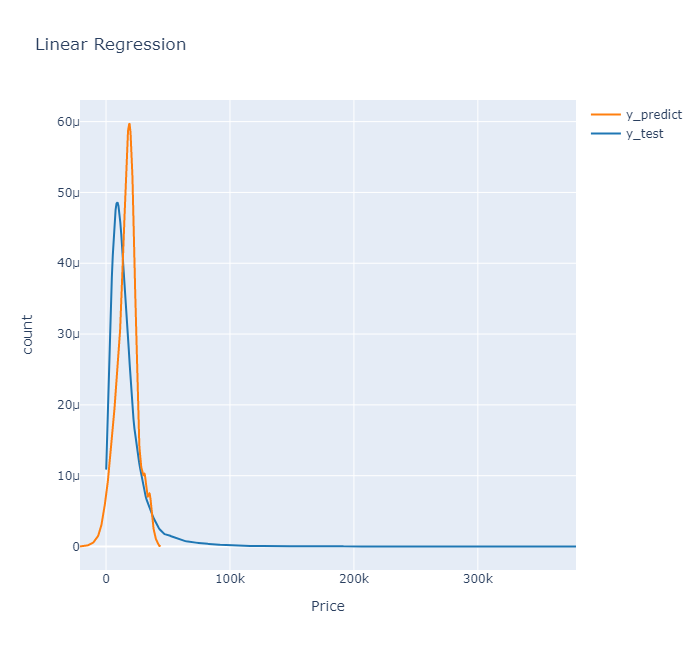

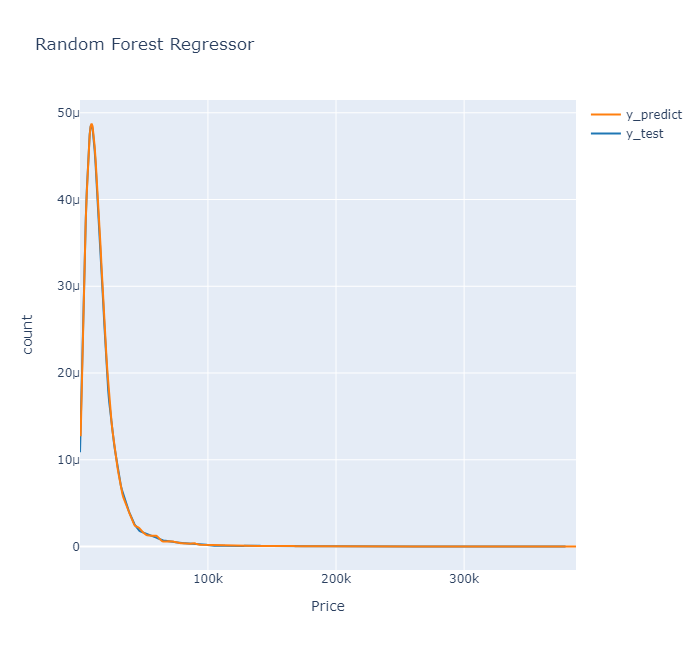

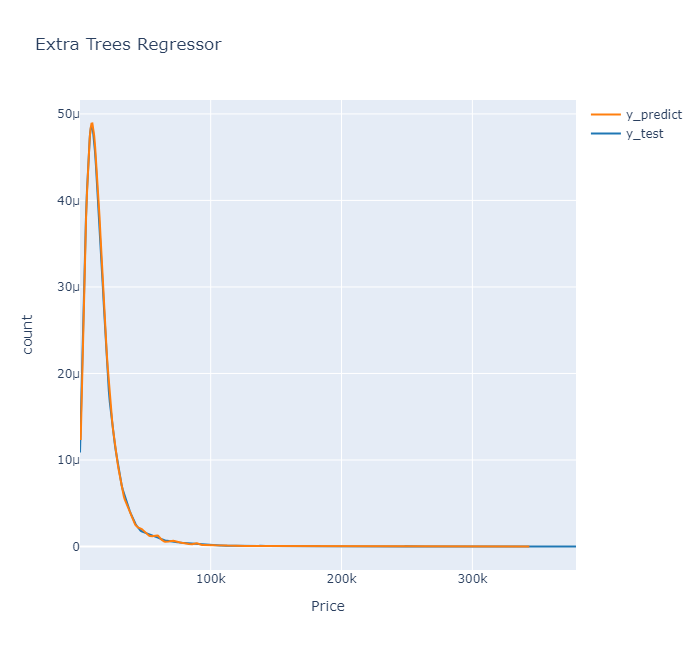

#### Feature Importance
Using 'model.feature_importances_' from the Extra Trees model we obtained the level of importances of each features towards prediction the price.

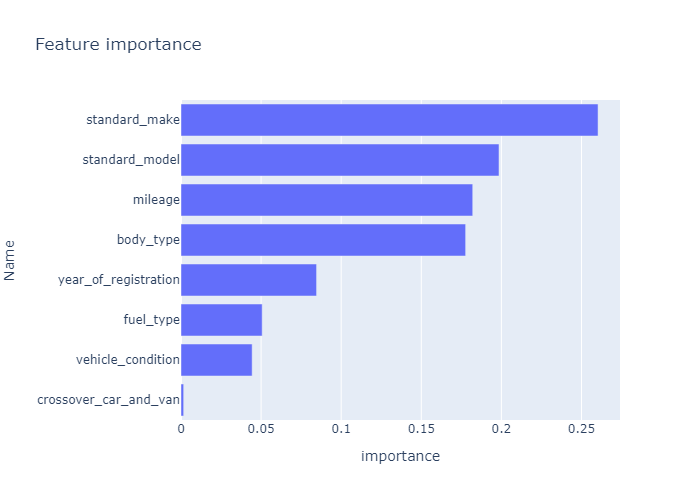

#### Final Result

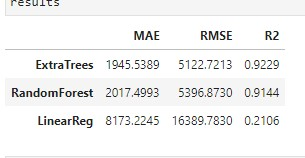

From the above results and evaluations, the ExtraTrees model is the best for prediction the price of vehicles in the dataset.